In [101]:
# Base -----------------------------------
import pathlib
import sys
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from datetime import *
#para mostrar todas las columnas de la tabla
pd.set_option('display.max_columns', None)

In [102]:
# Viz ------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
plt.style.use('seaborn')

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
dffile = '/content/drive/Shareddrives/Capstone - Repsol (Group 3)/Repsol Model/FINAL DATASET/FinalMerged_gasoline.csv'

df = pd.read_csv(dffile)

In [105]:
df

,Unnamed: 0.1,Unnamed: 0,year_month,region,total_consumption,gasoline_consumption,gasoline_price,gasoline_withoutaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,0,0,2014-01-01,Valencian Region,227804.72,35843.26,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44,3673.0,6529.0
1,1,1,2014-01-01,Madrid,277389.57,43800.44,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294,9720.0,17280.0
2,2,2,2014-01-01,La Rioja,24192.97,2028.32,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6,188.0,335.0
3,3,3,2014-01-01,Galicia,215829.82,16726.14,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25,1347.0,2394.0
4,4,4,2014-01-01,Extremadura,64147.55,7236.06,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2069,2069,2024-02-01,La Rioja,20264.90,2432.14,112.57,67.542,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2070,2070,2024-02-01,Madrid,234267.35,62760.81,112.57,67.542,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2071,2071,2024-02-01,Murcia,88885.71,11956.49,112.57,67.542,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2072,2072,2024-02-01,Navarre,66271.05,6345.71,112.57,67.542,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [106]:
# Drop the first two columns
df = df.iloc[:, 2:]

df

,year_month,region,total_consumption,gasoline_consumption,gasoline_price,gasoline_withoutaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,35843.26,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,43800.44,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,2028.32,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6,188.0,335.0
3,2014-01-01,Galicia,215829.82,16726.14,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,7236.06,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,2432.14,112.57,67.542,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,62760.81,112.57,67.542,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,11956.49,112.57,67.542,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,6345.71,112.57,67.542,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [107]:
dffileX = '/content/drive/Shareddrives/Capstone - Repsol (Group 3)/Repsol Model/FINAL DATASET/SURFACEAREA.CSV'

dfX = pd.read_csv(dffileX)

dfX = dfX.dropna(subset=['year_month'])

# Replace non-numeric values with NaN
dfX['surface_surface_area_to_build'] = pd.to_numeric(dfX['surface_surface_area_to_build'], errors='coerce')

# Convert the 'surface_surface_area_to_build' column to float64
dfX['surface_surface_area_to_build'] = dfX['surface_surface_area_to_build'].astype('float64')

# Convert 'year_month' to datetime
dfX['year_month'] = pd.to_datetime(dfX['year_month'], format='%m/%d/%y')

# Exclude rows with dates in the year 2023
dfX = dfX[dfX['year_month'].dt.year != 2023]

dfX


,year_month,region,surface_surface_area_to_build
0,2014-01-01,Valencian Region,44.0
1,2014-01-01,Madrid,294.0
2,2014-01-01,La Rioja,6.0
3,2014-01-01,Galicia,25.0
4,2014-01-01,Extremadura,16.0
...,...,...,...
1831,2022-12-01,La Rioja,2.0
1832,2022-12-01,Madrid,475.0
1833,2022-12-01,Murcia,18.0
1834,2022-12-01,Catalonia,238.0


In [108]:
import pandas as pd

# Assuming df is your initial dataframe
# Assuming dfX_cleaned is your cleaned dataframe with float64 values

# Ensure that the 'year_month' column in both dataframes is in datetime format for correct merging
df['year_month'] = pd.to_datetime(df['year_month'], errors='coerce')
dfX['year_month'] = pd.to_datetime(dfX['year_month'], errors='coerce')

# Merge df with dfX_cleaned on 'year_month' and 'region' to bring in the new values
df = df.merge(dfX[['year_month', 'region', 'surface_surface_area_to_build']],
                     on=['year_month', 'region'],
                     how='left',
                     suffixes=('', '_new'))

# Replace the old values with the new values where available
df['surface_surface_area_to_build'] = df['surface_surface_area_to_build_new'].combine_first(df['surface_surface_area_to_build'])

# Drop the temporary column used for merging
df.drop(columns=['surface_surface_area_to_build_new'], inplace=True)

# Display the updated dataframe
df


,year_month,region,total_consumption,gasoline_consumption,gasoline_price,gasoline_withoutaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,35843.26,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,43800.44,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,2028.32,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,16726.14,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,7236.06,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,2432.14,112.57,67.542,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,62760.81,112.57,67.542,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,11956.49,112.57,67.542,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,6345.71,112.57,67.542,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                2074 non-null   datetime64[ns]
 1   region                                    2074 non-null   object        
 2   total_consumption                         2074 non-null   float64       
 3   gasoline_consumption                      2074 non-null   float64       
 4   gasoline_price                            1462 non-null   float64       
 5   gasoline_withoutaxes                      1462 non-null   float64       
 6   lastbrentprice                            2074 non-null   object        
 7   apparent_temperature_max                  2074 non-null   float64       
 8   days_holidays                             1161 non-null   float64       
 9   gasoline_fleet                

In [110]:
# Convert year_month to datetime to filter data from 2014 to 2023
df['year_month'] = pd.to_datetime(df['year_month'])

# Filter the dataset to include only entries from 2014 to 2023
df_filtered = df[(df['year_month'].dt.year >= 2014) & (df['year_month'].dt.year <= 2023)]

# Get a list of columns that will be used for null value calculation (excluding unnecessary columns)
columns_to_check = df_filtered.columns.difference(['Unnamed: 0.1', 'Unnamed: 0', 'year_month', 'region'])

# Create a pivot table with regions as columns and variables as rows showing % of null values
null_percentage_table = df_filtered.pivot_table(
    index='region',
    values=columns_to_check,
    aggfunc=lambda x: x.isnull().mean() * 100
).T

# Display the null percentage table
null_percentage_table


region,Andalusia,Aragon,Asturias,Balearic Islands,Basque Country,Canary Islands,Cantabria,Castile and León,Castile-La Mancha,Catalonia,Extremadura,Galicia,La Rioja,Madrid,Murcia,Navarre,Valencian Region
IPC,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.0
UnemRate,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.0
apparent_temperature_max,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
covid_period,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
days_holidays,33.333333,40.0,33.333333,40.0,35.0,43.333333,30.833333,100.0,37.5,30.0,31.666667,30.833333,37.500000,38.333333,33.333333,37.5,100.0
diesel_fleet,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.000000,100.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0
gasoline_consumption,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
gasoline_fleet,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.000000,100.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0
gasoline_price,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
gasoline_withoutaxes,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0


In [111]:
import pandas as pd
import numpy as np

# Function to apply the desired formatting
def highlight_cells(val):
    if val > 50:
        color = 'red'
        font_weight = 'bold'
    elif 20 < val <= 50:
        color = 'orange'
        font_weight = 'normal'
    elif 1 < val <= 20:
        color = 'lightblue'
        font_weight = 'normal'
    else:
        color = ''
        font_weight = 'normal'
    return f'background-color: {color}; font-weight: {font_weight}'

# Apply the highlighting function to the DataFrame
styled_null_percentage_table = null_percentage_table.style.applymap(highlight_cells)

# Display the styled table
styled_null_percentage_table


region,Andalusia,Aragon,Asturias,Balearic Islands,Basque Country,Canary Islands,Cantabria,Castile and León,Castile-La Mancha,Catalonia,Extremadura,Galicia,La Rioja,Madrid,Murcia,Navarre,Valencian Region
IPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
UnemRate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
apparent_temperature_max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
covid_period,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
days_holidays,33.333333,40.000000,33.333333,40.000000,35.000000,43.333333,30.833333,100.000000,37.500000,30.000000,31.666667,30.833333,37.500000,38.333333,33.333333,37.500000,100.000000
diesel_fleet,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,100.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
gasoline_consumption,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gasoline_fleet,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,100.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
gasoline_price,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
gasoline_withoutaxes,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [112]:
# Drop the specified columns
df = df.drop(columns=['diesel_fleet', 'gasoline_fleet'])

In [113]:
df

,year_month,region,total_consumption,gasoline_consumption,gasoline_price,gasoline_withoutaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,35843.26,NaN,NaN,"106,40",13.14,NaN,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,43800.44,NaN,NaN,"106,40",6.79,2.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,2028.32,NaN,NaN,"106,40",7.77,2.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,16726.14,NaN,NaN,"106,40",9.92,2.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,7236.06,NaN,NaN,"106,40",11.49,2.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,2432.14,112.57,67.542,"81,91",11.00,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,62760.81,112.57,67.542,"81,91",10.73,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,11956.49,112.57,67.542,"81,91",17.86,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,6345.71,112.57,67.542,"81,91",9.92,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [114]:
# Convert 'year_month' to datetime
df['year_month'] = pd.to_datetime(df['year_month'])

# Ensure 'surface_surface_area_to_build' is converted to float, handling non-numeric values
df['surface_surface_area_to_build'] = df['surface_surface_area_to_build'].replace({',': '.', '--': '0'}, regex=True).astype(float)

In [115]:
df

,year_month,region,total_consumption,gasoline_consumption,gasoline_price,gasoline_withoutaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,35843.26,NaN,NaN,"106,40",13.14,NaN,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,43800.44,NaN,NaN,"106,40",6.79,2.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,2028.32,NaN,NaN,"106,40",7.77,2.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,16726.14,NaN,NaN,"106,40",9.92,2.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,7236.06,NaN,NaN,"106,40",11.49,2.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,2432.14,112.57,67.542,"81,91",11.00,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,62760.81,112.57,67.542,"81,91",10.73,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,11956.49,112.57,67.542,"81,91",17.86,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,6345.71,112.57,67.542,"81,91",9.92,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


# **Andalusia**

In [116]:
import pandas as pd

# Assuming df is your original DataFrame
df_Andalusia = df[df['region'] == 'Andalusia']

# Display the first few rows to confirm
print(df_Andalusia.head())


   year_month     region  total_consumption  gasoline_consumption  \
13 2014-01-01  Andalusia          377814.73              53653.86   
17 2014-02-01  Andalusia          347637.16              49362.71   
34 2014-03-01  Andalusia          404570.46              57169.36   
51 2014-04-01  Andalusia          386716.46              57971.26   
70 2014-05-01  Andalusia          406517.14              59242.13   

    gasoline_price  gasoline_withoutaxes lastbrentprice  \
13             NaN                   NaN         106,40   
17             NaN                   NaN         109,07   
34             NaN                   NaN         107,76   
51             NaN                   NaN         108,07   
70             NaN                   NaN         109,41   

    apparent_temperature_max  days_holidays  UnemRate  IPC           gdp  \
13                     13.67            2.0     34.94  0.1  1.144824e+07   
17                     13.45            1.0     34.94 -0.2  1.175540e+07   
34

In [117]:
df_Andalusia

,year_month,region,total_consumption,gasoline_consumption,gasoline_price,gasoline_withoutaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
13,2014-01-01,Andalusia,377814.73,53653.86,NaN,NaN,"106,40",13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0,0,0.5,-0.5,-0.5,105.607,1,0,104.0,3998.0,7107.0
17,2014-02-01,Andalusia,347637.16,49362.71,NaN,NaN,"109,07",13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0,0,0.2,0.0,0.2,95.693,1,0,102.0,3998.0,7107.0
34,2014-03-01,Andalusia,404570.46,57169.36,NaN,NaN,"107,76",18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0,0,0.5,0.0,0.3,105.974,1,0,224.0,3998.0,7107.0
51,2014-04-01,Andalusia,386716.46,57971.26,NaN,NaN,"108,07",24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0,0,0.0,0.4,0.9,94.041,1,1,80.0,3998.0,7107.0
70,2014-05-01,Andalusia,406517.14,59242.13,NaN,NaN,"109,41",28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0,0,0.0,0.1,0.0,104.709,1,1,133.0,3998.0,7107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,2023-10-01,Andalusia,422323.74,76644.19,117.293,70.3758,"85,02",26.56,1.0,17.61,3.8,1.520131e+07,8584147.0,1770.858608,0,1,-0.8,-0.9,0.5,104.806,1,1,NaN,9821.0,4230.0
2009,2023-11-01,Andalusia,427503.33,72009.46,112.294,67.3764,"80,86",19.86,1.0,17.61,3.5,1.524318e+07,8584147.0,1775.736256,0,1,-1.5,-1.5,-0.5,99.485,1,0,NaN,9821.0,4230.0
2031,2023-12-01,Andalusia,423986.51,75578.51,108.366,65.0196,"77,04",14.67,3.0,17.61,3.3,1.701876e+07,8584147.0,1982.580448,0,1,0.8,-1.2,0.2,87.902,1,0,NaN,9821.0,4230.0
2054,2024-01-01,Andalusia,412239.17,70984.80,108.874,65.3244,"80,55",16.74,NaN,17.77,3.8,1.161581e+07,8584147.0,1353.170298,0,1,3.7,0.2,-0.1,96.894,1,0,NaN,NaN,NaN


In [118]:
# Drop the specified columns
df_Andalusia = df_Andalusia.drop(columns=['total_consumption', 'gasoline_withoutaxes', 'touristic_region', 'region'])


In [119]:
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def download_excel(df):
    # Create a BytesIO buffer to save the Excel file
    output = BytesIO()
    # Using the default Excel writer
    df.to_excel(output, index=False)
    output.seek(0)

    # Encode the Excel file to base64
    data = base64.b64encode(output.read()).decode('utf-8')

    # Generate a download link
    html = '<a download="df_filled.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{0}" target="_blank">Download Excel file</a>'.format(data)
    display(HTML(html))

# Assume df is your DataFrame
download_excel(df_Andalusia)

In [120]:
# Assuming df_global is your original DataFrame

# Create a sub-data frame 'df_surface' with only the 'year_month' and 'surface_surface_area_to_build' columns
df_surface = df_Andalusia[['year_month', 'surface_surface_area_to_build']]

# Display the sub-data frame
df_surface

,year_month,surface_surface_area_to_build
13,2014-01-01,104.0
17,2014-02-01,102.0
34,2014-03-01,224.0
51,2014-04-01,80.0
70,2014-05-01,133.0
...,...,...
1997,2023-10-01,NaN
2009,2023-11-01,NaN
2031,2023-12-01,NaN
2054,2024-01-01,NaN


                                     SARIMAX Results                                     
Dep. Variable:     surface_surface_area_to_build   No. Observations:                  110
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -621.159
Date:                           Wed, 10 Jul 2024   AIC                           1252.319
Time:                                   11:53:52   BIC                           1265.541
Sample:                                        0   HQIC                          1257.676
                                           - 110                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3512      0.119      2.945      0.003       0.117       0.585
ar.L2          0.1413      0.122      1.156

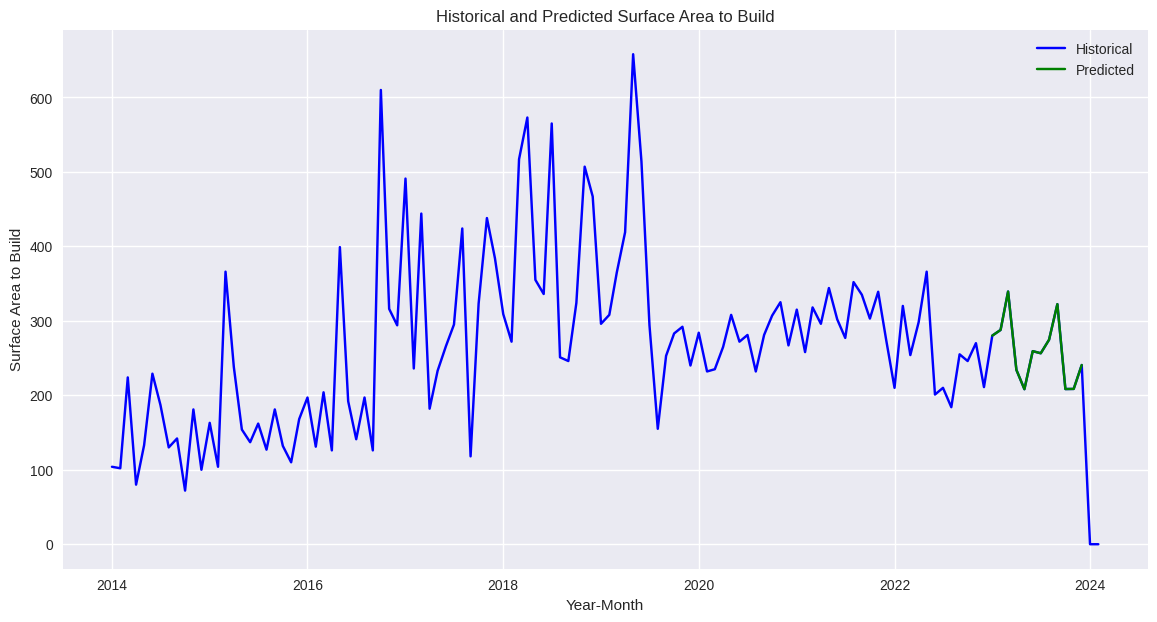

In [121]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_surface is your DataFrame
# Convert 'year_month' to datetime
df_surface['year_month'] = pd.to_datetime(df_surface['year_month'])

# Exclude rows with dates in the year 2023
df_surface_filtered = df_surface[df_surface['year_month'].dt.year != 2023]

# Fit SARIMA model
order = (2, 0, 0)  # (p,d,q)
seasonal_order = (2, 1, 0, 6)  # (P,D,Q,s)
model = SARIMAX(df_surface_filtered['surface_surface_area_to_build'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Show statistical summary
print(results.summary())

# Plot ACF and PACF of residuals
residuals = results.resid


# Ljung-Box test for white noise
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_result)

# Forecasting for 2023
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='MS')
forecast_df = forecast.predicted_mean
forecast_df.index = forecast_index

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Display the combined DataFrame
print(df_combined)

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Create the 'surface_area' column
df_combined['surface_area'] = df_combined.apply(
    lambda row: row['surface_surface_area_to_build'] if row['year_month'].year != 2023 else row['predictions'],
    axis=1
)

# Plot the historical and predicted values
plt.figure(figsize=(14, 7))
plt.plot(df_combined['year_month'], df_combined['surface_area'], label='Historical', color='blue')
plt.plot(df_combined[df_combined['year_month'].dt.year == 2023]['year_month'],
         df_combined[df_combined['year_month'].dt.year == 2023]['surface_area'],
         label='Predicted', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Surface Area to Build')
plt.title('Historical and Predicted Surface Area to Build')
plt.legend()
plt.show()

In [122]:


# Drop the unnecessary columns
df_combined.drop(columns=['surface_surface_area_to_build', 'predictions'], inplace=True)

# Display the combined DataFrame
print(df_combined)


    year_month  surface_area
0   2014-01-01    104.000000
1   2014-02-01    102.000000
2   2014-03-01    224.000000
3   2014-04-01     80.000000
4   2014-05-01    133.000000
..         ...           ...
117 2023-10-01    208.383742
118 2023-11-01    208.558178
119 2023-12-01    240.654310
120 2024-01-01      0.000000
121 2024-02-01      0.000000

[122 rows x 2 columns]


In [123]:
# Merge df_global with df_combined on 'year_month'
df_Andalusia = pd.merge(df_Andalusia, df_combined[['year_month', 'surface_area']], on='year_month', how='left')

# Replace 'surface_surface_area_to_build' in df_global with 'surface_area' from df_combined
df_Andalusia['surface_surface_area_to_build'] = df_Andalusia['surface_area']

# Drop the 'surface_area' column as it is no longer needed
df_Andalusia.drop(columns=['surface_area'], inplace=True)

# Display the updated DataFrame
print(df_Andalusia)


    year_month  gasoline_consumption  gasoline_price lastbrentprice  \
0   2014-01-01              53653.86             NaN         106,40   
1   2014-02-01              49362.71             NaN         109,07   
2   2014-03-01              57169.36             NaN         107,76   
3   2014-04-01              57971.26             NaN         108,07   
4   2014-05-01              59242.13             NaN         109,41   
..         ...                   ...             ...            ...   
117 2023-10-01              76644.19         117.293          85,02   
118 2023-11-01              72009.46         112.294          80,86   
119 2023-12-01              75578.51         108.366          77,04   
120 2024-01-01              70984.80         108.874          80,55   
121 2024-02-01              68968.81         112.570          81,91   

     apparent_temperature_max  days_holidays  UnemRate  IPC           gdp  \
0                       13.67            2.0     34.94  0.1  1.144824e

In [124]:
import pandas as pd
import numpy as np

# Assuming df_global is your DataFrame
# Convert 'year_month' to datetime if it isn't already
df_Andalusia['year_month'] = pd.to_datetime(df_Andalusia['year_month'])

# Filter for rows in the year 2024
mask_2024 = df_Andalusia['year_month'].dt.year == 2024

# Replace 0s with NaNs in the specified rows
df_Andalusia.loc[mask_2024] = df_Andalusia.loc[mask_2024].replace(0, np.nan)

# Display the updated DataFrame
df_Andalusia

,year_month,gasoline_consumption,gasoline_price,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,53653.86,NaN,"106,40",13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0.0,0.0,0.5,-0.5,-0.5,105.607,0.0,104.000000,3998.0,7107.0
1,2014-02-01,49362.71,NaN,"109,07",13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0.0,0.0,0.2,0.0,0.2,95.693,0.0,102.000000,3998.0,7107.0
2,2014-03-01,57169.36,NaN,"107,76",18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0.0,0.0,0.5,0.0,0.3,105.974,0.0,224.000000,3998.0,7107.0
3,2014-04-01,57971.26,NaN,"108,07",24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0.0,0.0,0.0,0.4,0.9,94.041,1.0,80.000000,3998.0,7107.0
4,2014-05-01,59242.13,NaN,"109,41",28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0.0,0.0,0.0,0.1,0.0,104.709,1.0,133.000000,3998.0,7107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,76644.19,117.293,"85,02",26.56,1.0,17.61,3.8,1.520131e+07,8584147.0,1770.858608,0.0,1.0,-0.8,-0.9,0.5,104.806,1.0,208.383742,9821.0,4230.0
118,2023-11-01,72009.46,112.294,"80,86",19.86,1.0,17.61,3.5,1.524318e+07,8584147.0,1775.736256,0.0,1.0,-1.5,-1.5,-0.5,99.485,0.0,208.558178,9821.0,4230.0
119,2023-12-01,75578.51,108.366,"77,04",14.67,3.0,17.61,3.3,1.701876e+07,8584147.0,1982.580448,0.0,1.0,0.8,-1.2,0.2,87.902,0.0,240.654310,9821.0,4230.0
120,2024-01-01,70984.80,108.874,"80,55",16.74,NaN,17.77,3.8,1.161581e+07,8584147.0,1353.170298,NaN,1.0,3.7,0.2,-0.1,96.894,NaN,NaN,NaN,NaN


In [125]:
# Replace commas with dots in all columns to convert to numeric values
for col in df_Andalusia.columns:
    if df_Andalusia[col].dtype == object:
        df_Andalusia[col] = df_Andalusia[col].str.replace(',', '.').astype(float)

# Convert all other columns to float64 except 'year_month'
for col in df_Andalusia.columns:
    if col != 'year_month':
        df_Andalusia[col] = df_Andalusia[col].astype('float64')

# Drop the 'gasoline_price' column
df_Andalusia.drop(columns=['gasoline_price'], inplace=True)

# Display the dataframe info to confirm changes
df_Andalusia.info()

# Calculate 12-month moving average for 'gasoline_consumption' and 'gdp_xcapita'
df_Andalusia['gasoline_consumption_ma'] = df_Andalusia['gasoline_consumption'].rolling(window=12).mean()
df_Andalusia['gdp_xcapita_ma'] = df_Andalusia['gdp_xcapita'].rolling(window=12).mean()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   gasoline_consumption                      122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   days_holidays                             80 non-null     float64       
 5   UnemRate                                  122 non-null    float64       
 6   IPC                                       122 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   gdp_xcapita                     

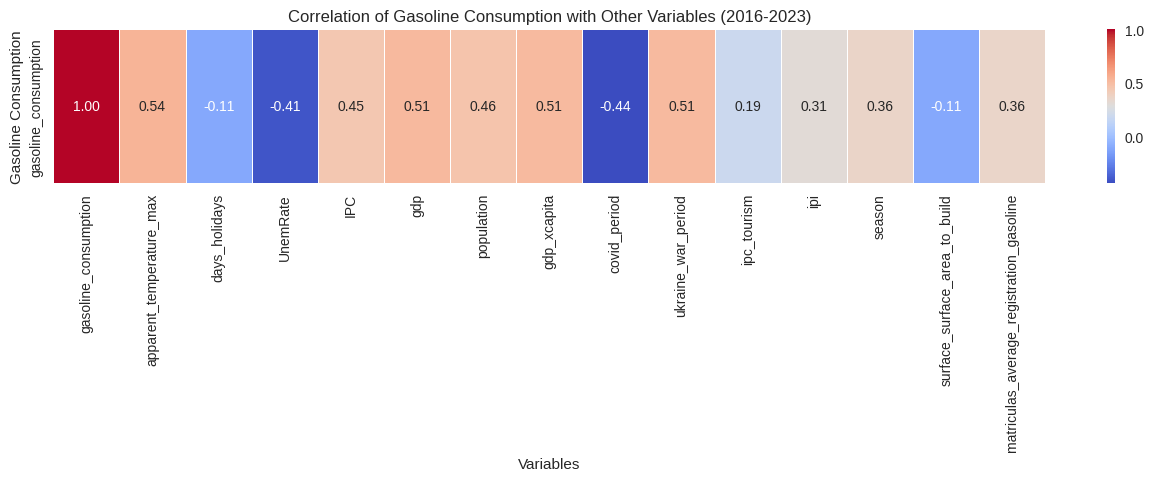

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_Andalusia[(df_Andalusia['year_month'] >= '2016-01-01') & (df_Andalusia['year_month'] <= '2023-12-31')]

# Columns to exclude
columns_to_exclude = ['year_month', 'lastbrentprice', 'matriculas_average_registration_diesel', 'gasoline_consumption_ma', 'gdp_xcapita_ma']

# Drop the specified columns
df_filtered = df_filtered.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Filter the correlation matrix to only show values greater than 0.1 or less than -0.1
filtered_corr_matrix = correlation_matrix.loc[['gasoline_consumption']].T
filtered_corr_matrix = filtered_corr_matrix[(filtered_corr_matrix['gasoline_consumption'] > 0.1) | (filtered_corr_matrix['gasoline_consumption'] < -0.1)]

# Generate a heatmap
plt.figure(figsize=(16, 2))
sns.heatmap(filtered_corr_matrix.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Gasoline Consumption with Other Variables (2016-2023)')
plt.xlabel('Variables')
plt.ylabel('Gasoline Consumption')
plt.show()


# Model Development

In [127]:
df_Andalusia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   gasoline_consumption                      122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   days_holidays                             80 non-null     float64       
 5   UnemRate                                  122 non-null    float64       
 6   IPC                                       122 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   gdp_xcapita                     

In [128]:
# Fill missing values in covid_period column with 0
df_Andalusia['covid_period'].fillna(0, inplace=True)

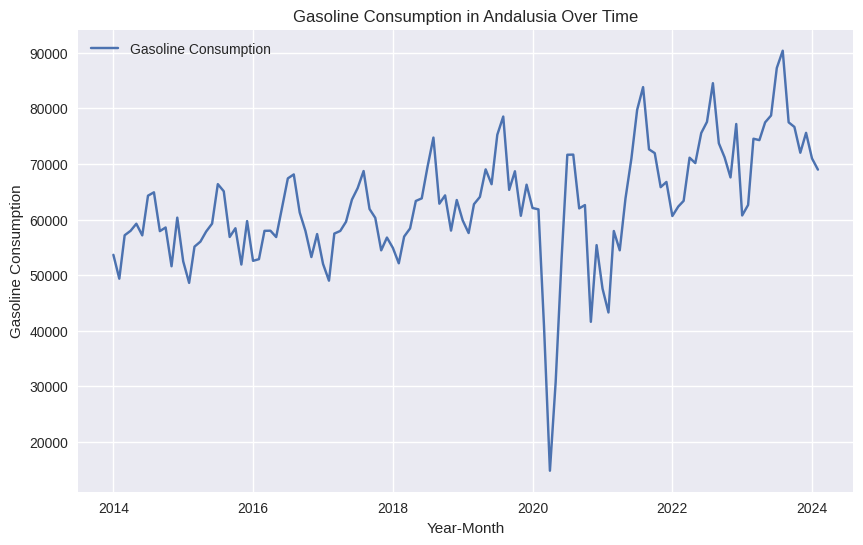

In [129]:
import matplotlib.pyplot as plt

# Plot the gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Andalusia['year_month'], df_Andalusia['gasoline_consumption'], label='Gasoline Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Gasoline Consumption')
plt.title('Gasoline Consumption in Andalusia Over Time')
plt.legend()
plt.show()

In [130]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Andalusia['gasoline_consumption'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('if p-value > 0.05 --> Data is not stationary')

ADF Statistic: -0.9076279918819761
p-value: 0.7854500320582919
if p-value > 0.05 --> Data is not stationary


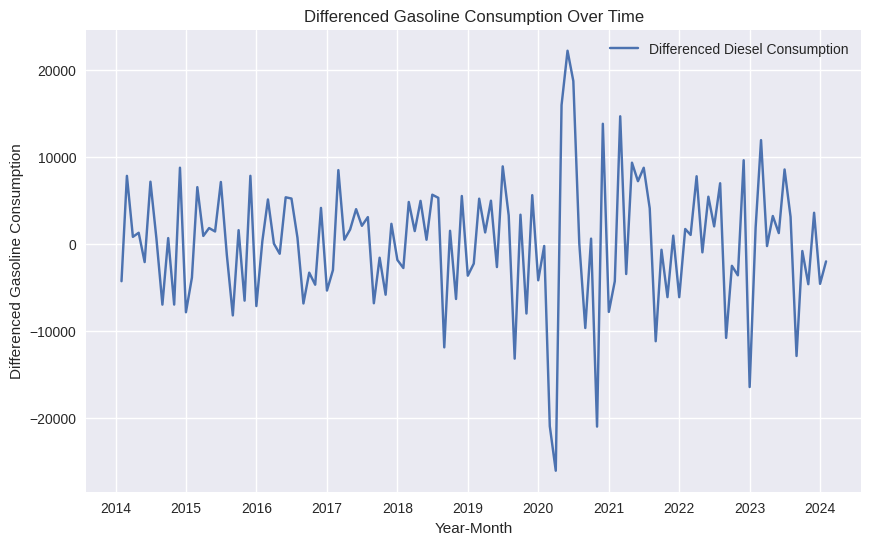

In [131]:
# Differencing the gasoline consumption
df_Andalusia['gasoline_consumption_diff'] = df_Andalusia['gasoline_consumption'].diff()

# Plot the differenced gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Andalusia['year_month'], df_Andalusia['gasoline_consumption_diff'], label='Differenced Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Differenced Gasoline Consumption')
plt.title('Differenced Gasoline Consumption Over Time')
plt.legend()
plt.show()

In [132]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Andalusia['gasoline_consumption_diff'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

print('if p-value < 0.05 --> Data is stationary')

ADF Statistic: -4.151230811073914
p-value: 0.0007959823996110153
if p-value < 0.05 --> Data is stationary


In [133]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_result = acorr_ljungbox(df_Andalusia['gasoline_consumption'].dropna(), lags=[10])

# Print the test results
print('Ljung-Box Test Statistic:', ljung_box_result['lb_stat'].values)
print('p-values:', ljung_box_result['lb_pvalue'].values)
print('if p-value < 0.05 --> Data is correlated (and not WN)')

Ljung-Box Test Statistic: [146.57963082]
p-values: [1.88201875e-26]
if p-value < 0.05 --> Data is correlated (and not WN)


In [134]:
# Split the data
train = df_Andalusia[df_Andalusia['year_month'] < '2023-01-01']
test = df_Andalusia[df_Andalusia['year_month'] >= '2023-01-01']

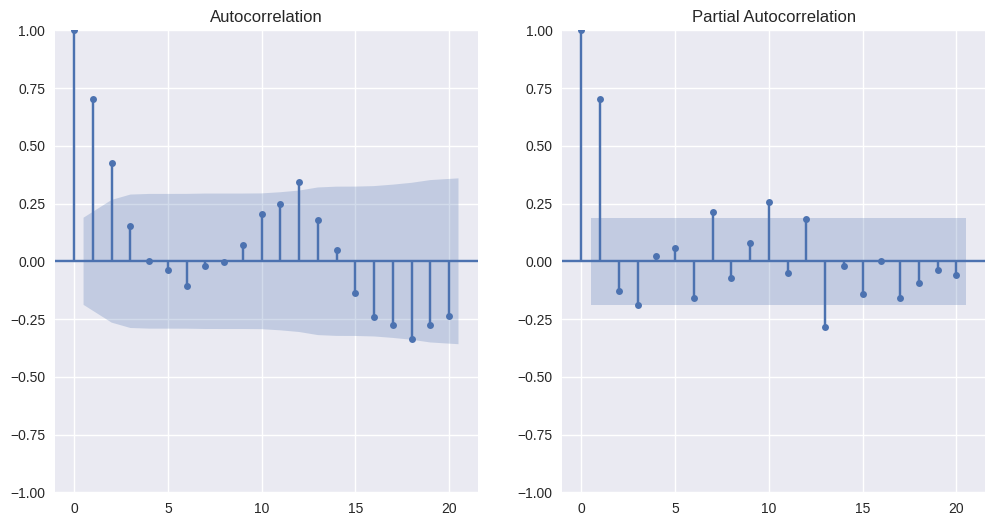

In [135]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train['gasoline_consumption'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(train['gasoline_consumption'], lags=20, ax=plt.gca())
plt.show()

In [136]:
import statsmodels.api as sm

# Define the SARIMAX model with the new exogenous variable
model = sm.tsa.statespace.SARIMAX(train['gasoline_consumption'],
                                  order=(0, 1, 0),
                                  seasonal_order=(0, 1, 1, 12),
                                  exog=train[['covid_period', 'ipi']])

# Fit the model
sarimax_model = model.fit()

# Print the statistical summary
print(sarimax_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 gasoline_consumption   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -943.209
Date:                              Wed, 10 Jul 2024   AIC                           1894.419
Time:                                      11:53:56   BIC                           1904.634
Sample:                                           0   HQIC                          1898.546
                                              - 108                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
covid_period -1.387e+04   2232.523     -6.213      0.000   -1.82e+04   -9494.957
ipi          

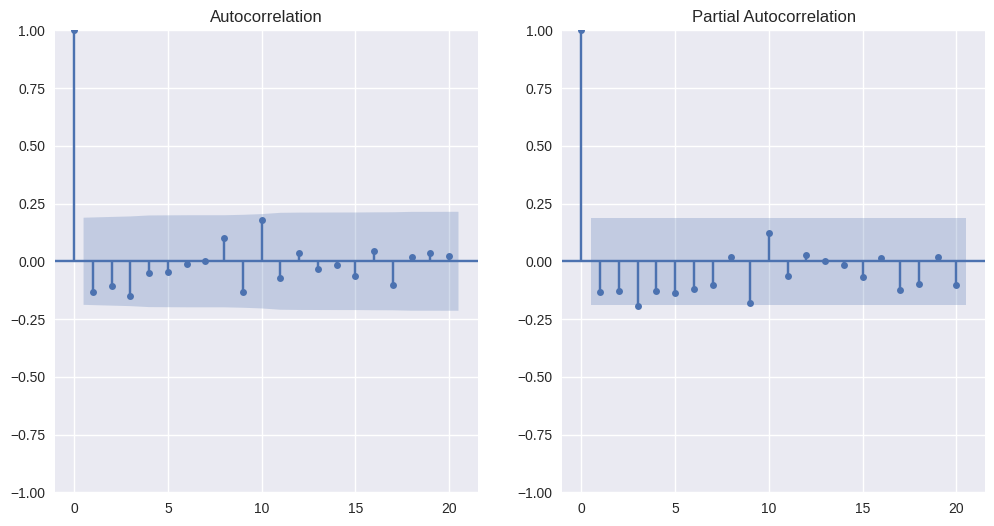

In [137]:
# Plot ACF and PACF of residuals
residuals = sarimax_model.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.show()

In [138]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
ljung_box_result_resid = acorr_ljungbox(residuals, lags=[10])

# Print the test results
print('Ljung-Box Test Statistic (Residuals):', ljung_box_result_resid['lb_stat'].values)
print('p-values (Residuals):', ljung_box_result_resid['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

Ljung-Box Test Statistic (Residuals): [13.82904947]
p-values (Residuals): [0.18093297]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [139]:
# Drop rows with dates beyond 2023
df_Andalusia = df_Andalusia[df_Andalusia['year_month'] < '2024-01-01']

In [140]:
# Ensure there are no infinite values
df_Andalusia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify if there are any remaining NaNs or infinite values
print(df_Andalusia[['covid_period']].isnull().sum())
print(np.isfinite(df_Andalusia[['covid_period']]).sum())

covid_period    0
dtype: int64
covid_period    120
dtype: int64


In [141]:
# Fill missing values with 0
train['covid_period'].fillna(0, inplace=True)
test['covid_period'].fillna(0, inplace=True)

# Replace infinite values with 0
train['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
test['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify that there are no more infinite or missing values
print('Missing values in train:', train[['covid_period']].isnull().sum())
print('Infinite values in train:', np.isfinite(train[['covid_period']]).sum())
print('Missing values in test:', test[['covid_period']].isnull().sum())
print('Infinite values in test:', np.isfinite(test[['covid_period']]).sum())

Missing values in train: covid_period    0
dtype: int64
Infinite values in train: covid_period    108
dtype: int64
Missing values in test: covid_period    0
dtype: int64
Infinite values in test: covid_period    14
dtype: int64


In [142]:
# Ensure the indices are properly aligned
test_exog = test[['covid_period', 'ipi']]

# Make predictions for the test set
predictions = sarimax_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog, dynamic=False)

# Add in-sample predictions to the DataFrame
train_exog = train[['covid_period']]
in_sample_predictions = sarimax_model.predict(start=0, end=len(train) - 1, exog=train_exog, dynamic=False)

# Combine in-sample and out-of-sample predictions
full_predictions = pd.concat([in_sample_predictions, predictions])

# Ensure the length of predictions matches the length of df_global
df_Andalusia['predictions'] = full_predictions.reset_index(drop=True)

In [143]:
# Ensure that the length of the predictions for 2023 matches the number of rows in 2023
rows_2023 = df_Andalusia[df_Andalusia['year_month'] >= '2023-01-01'].index
if len(predictions) == len(rows_2023):
    df_Andalusia.loc[rows_2023, 'historical_and_predicted'] = predictions.values
else:
    print(f"Length mismatch: predictions length is {len(predictions)}, but 2023 rows count is {len(rows_2023)}")

Length mismatch: predictions length is 14, but 2023 rows count is 12


In [144]:
df_Andalusia

,year_month,gasoline_consumption,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,gasoline_consumption_ma,gdp_xcapita_ma,gasoline_consumption_diff,predictions
0,2014-01-01,53653.86,106.40,13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0.0,0.0,0.5,-0.5,-0.5,105.607,0.0,104.000000,3998.0,7107.0,NaN,NaN,NaN,63680.349743
1,2014-02-01,49362.71,109.07,13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0.0,0.0,0.2,0.0,0.2,95.693,0.0,102.000000,3998.0,7107.0,NaN,NaN,-4291.15,47675.781015
2,2014-03-01,57169.36,107.76,18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0.0,0.0,0.5,0.0,0.3,105.974,0.0,224.000000,3998.0,7107.0,NaN,NaN,7806.65,55562.087652
3,2014-04-01,57971.26,108.07,24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0.0,0.0,0.0,0.4,0.9,94.041,1.0,80.000000,3998.0,7107.0,NaN,NaN,801.90,49973.836848
4,2014-05-01,59242.13,109.41,28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0.0,0.0,0.0,0.1,0.0,104.709,1.0,133.000000,3998.0,7107.0,NaN,NaN,1270.87,64403.996192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08-01,90345.92,86.83,39.03,1.0,18.77,2.9,1.529028e+07,8584147.0,1781.222680,0.0,1.0,0.0,2.9,0.3,95.879,1.0,274.560322,9821.0,4230.0,74627.960000,1889.488879,3103.10,96640.428796
116,2023-09-01,77468.21,95.31,30.63,NaN,18.77,3.8,1.746663e+07,8584147.0,2034.754748,0.0,1.0,0.5,1.1,0.3,101.853,1.0,322.366211,9821.0,4230.0,74941.255833,1908.620979,-12877.71,83618.670770
117,2023-10-01,76644.19,85.02,26.56,1.0,17.61,3.8,1.520131e+07,8584147.0,1770.858608,0.0,1.0,-0.8,-0.9,0.5,104.806,1.0,208.383742,9821.0,4230.0,75396.113333,1897.420395,-824.02,85584.930444
118,2023-11-01,72009.46,80.86,19.86,1.0,17.61,3.5,1.524318e+07,8584147.0,1775.736256,0.0,1.0,-1.5,-1.5,-0.5,99.485,0.0,208.558178,9821.0,4230.0,75766.156667,1890.439503,-4634.73,76046.276398


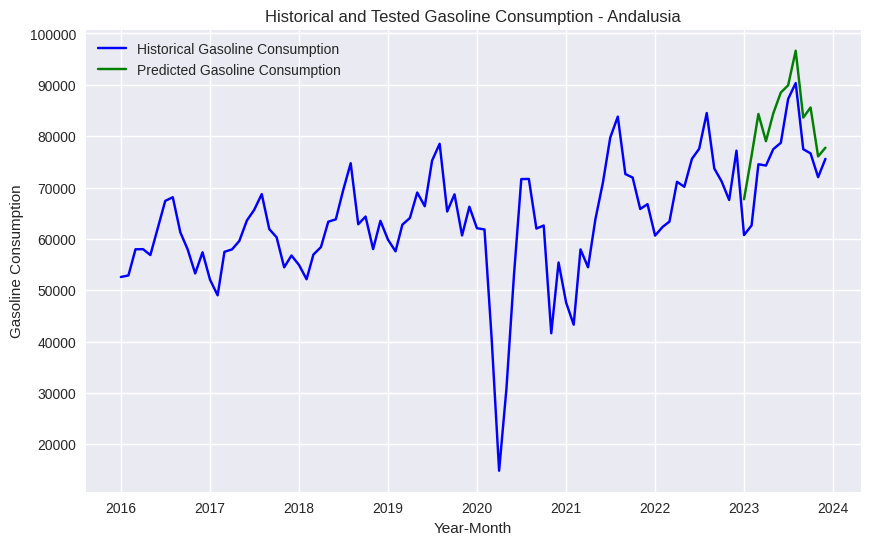

In [145]:
import matplotlib.pyplot as plt

# Filter the dataframe to include data from 2016 onwards
df_filtered = df_Andalusia[df_Andalusia['year_month'] >= '2016-01']

# Separate historical and predicted data
historical_data = df_filtered.copy()
predicted_data = df_filtered[df_filtered['year_month'] >= '2023-01']

# Plot historical and predicted values
plt.figure(figsize=(10, 6))
plt.plot(historical_data['year_month'], historical_data['gasoline_consumption'], label='Historical Gasoline Consumption', color='blue')
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Gasoline Consumption', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Gasoline Consumption')
plt.title('Historical and Tested Gasoline Consumption - Andalusia')
plt.legend()
plt.show()


In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAPE
mape = np.mean(np.abs((test['gasoline_consumption'] - predictions) / test['gasoline_consumption'])) * 100

# Calculate MAE and RMSE
mae = mean_absolute_error(test['gasoline_consumption'], predictions)
rmse = np.sqrt(mean_squared_error(test['gasoline_consumption'], predictions))

# Print accuracy metrics
print('MAPE:', mape)
print('MAE:', mae)
print('RMSE:', rmse)

MAPE: 9.654179840154589
MAE: 7007.049814019299
RMSE: 7623.8625048690155


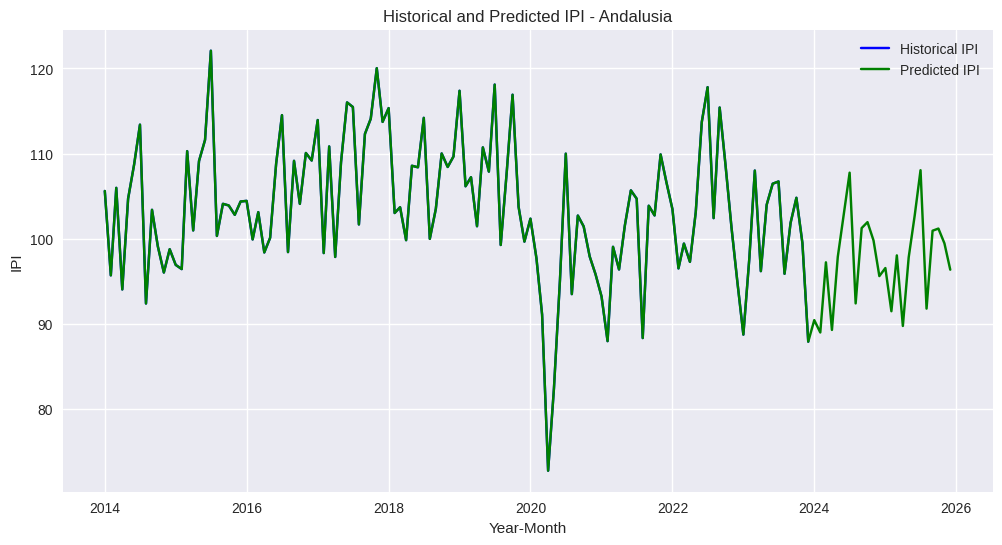

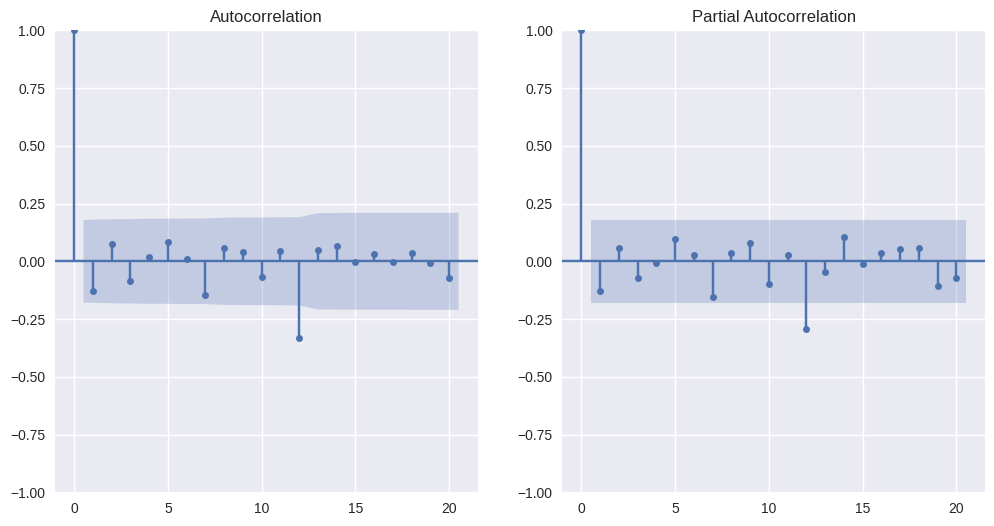

Ljung-Box Test Statistic (IPI Residuals): [8.42980109]
p-values (IPI Residuals): [0.58693105]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [147]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure there are no infinite values
df_Andalusia['ipi'].replace([np.inf, -np.inf], 0, inplace=True)

# Define the SARIMAX model for IPI
model_ipi = sm.tsa.statespace.SARIMAX(df_Andalusia['ipi'],
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12))

# Fit the model
sarimax_model_ipi = model_ipi.fit()

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates_ipi = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df_ipi = pd.DataFrame({'year_month': future_dates_ipi})

# Make predictions for the future period (2024 and 2025) for IPI
future_predictions_ipi = sarimax_model_ipi.get_forecast(steps=len(future_df_ipi)).predicted_mean

# Combine historical and future data for IPI
combined_df_ipi = pd.concat([df_Andalusia[['year_month', 'ipi']], future_df_ipi], ignore_index=True)
combined_df_ipi['predicted_ipi'] = pd.concat([df_Andalusia['ipi'], future_predictions_ipi], ignore_index=True)

# Plot IPI predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['ipi'], label='Historical IPI', color='blue')
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['predicted_ipi'], label='Predicted IPI', color='green')
plt.xlabel('Year-Month')
plt.ylabel('IPI')
plt.title('Historical and Predicted IPI - Andalusia')
plt.legend()
plt.show()

# Plot ACF and PACF of IPI residuals
residuals_ipi = sarimax_model_ipi.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals_ipi, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals_ipi, lags=20, ax=plt.gca())
plt.show()

# Perform the Ljung-Box test on IPI residuals
ljung_box_result_resid_ipi = acorr_ljungbox(residuals_ipi, lags=[10])

# Print the test results for IPI residuals
print('Ljung-Box Test Statistic (IPI Residuals):', ljung_box_result_resid_ipi['lb_stat'].values)
print('p-values (IPI Residuals):', ljung_box_result_resid_ipi['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')


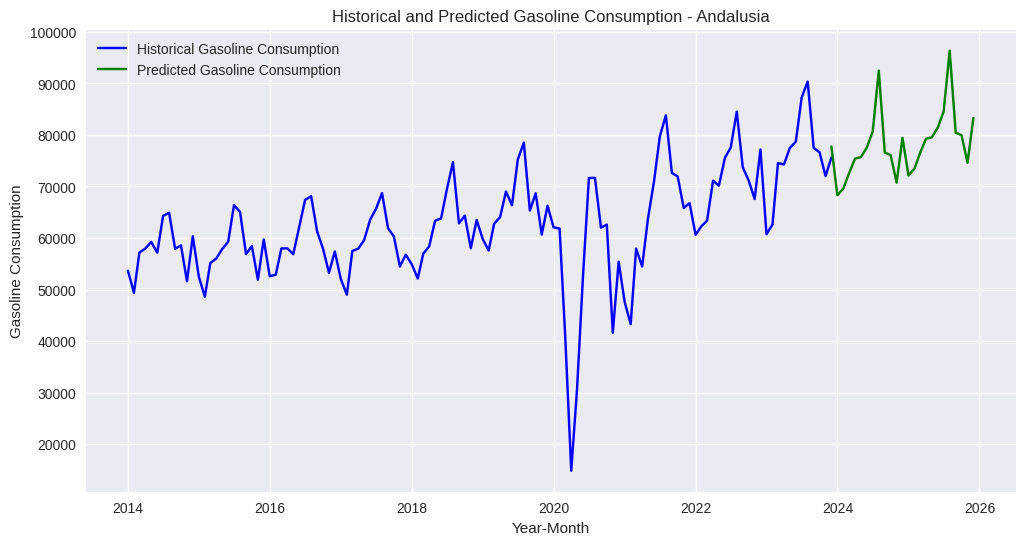

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df_Andalusia already contains the entire dataset including 2023
# Fill missing values and handle infinite values
df_Andalusia['covid_period'].fillna(0, inplace=True)
df_Andalusia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
df_Andalusia['ipi'].fillna(method='ffill', inplace=True)

# Ensure the DataFrame is sorted by date
df_Andalusia.sort_values(by='year_month', inplace=True)
# Define the SARIMAX model using the entire dataset
model = sm.tsa.statespace.SARIMAX(df_Andalusia['gasoline_consumption'],
                                  order=(0, 1, 0),
                                  seasonal_order=(0, 1, 1, 12),
                                  exog=df_Andalusia[['covid_period', 'ipi']]) # Fit the model
sarimax_model = model.fit()
# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df = pd.DataFrame({'year_month': future_dates})

# Create a placeholder for the 'covid_period' column in the future data (assuming no covid period for simplicity)
future_df['covid_period'] = 0

# Fill in the 'ipi' column for future dates based on historical data or assumptions
# Here, we use the last available 'ipi' value from the historical data as a simple assumption
last_ipi_value = df_Andalusia['ipi'].iloc[-1]
future_df['ipi'] = last_ipi_value

# Set the index to 'year_month' to align with the historical data
future_df.set_index('year_month', inplace=True)

# Make predictions for the future period (2024 and 2025)
future_exog = future_df[['covid_period', 'ipi']]
future_predictions = sarimax_model.get_forecast(steps=len(future_df), exog=future_exog).predicted_mean

# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame({'year_month': future_dates, 'predictions': future_predictions.values})

# Merge historical and future predictions
df_Andalusia.reset_index(drop=True, inplace=True)
future_predictions_df.reset_index(drop=True, inplace=True)

# Combine historical and future data
combined_df = pd.concat([df_Andalusia, future_predictions_df], ignore_index=True)

# Correct the 'year_month' column format for future predictions
combined_df['year_month'] = pd.to_datetime(combined_df['year_month'])

# Filter the dataframe to include data before and after 2023
historical_data = combined_df[combined_df['year_month'] < '2024-02-01']
predicted_data = combined_df[combined_df['year_month'] >= '2023-12-01']

# Plot historical and predicted values
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(historical_data['year_month'], historical_data['gasoline_consumption'], label='Historical Gasoline Consumption', color='blue')

# Plot predicted data
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Gasoline Consumption', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Gasoline Consumption')
plt.title('Historical and Predicted Gasoline Consumption - Andalusia')
plt.legend()
plt.show()


# **Catalonia**

In [149]:
import pandas as pd

# Assuming df is your original DataFrame
df_Catalonia = df[df['region'] == 'Catalonia']

# Display the first few rows to confirm
print(df_Catalonia.head())

   year_month     region  total_consumption  gasoline_consumption  \
16 2014-01-01  Catalonia          390505.34              56681.16   
32 2014-02-01  Catalonia          371057.79              55174.63   
43 2014-03-01  Catalonia          395673.79              62144.07   
57 2014-04-01  Catalonia          372492.90              62612.49   
79 2014-05-01  Catalonia          380072.39              64488.68   

    gasoline_price  gasoline_withoutaxes lastbrentprice  \
16             NaN                   NaN         106,40   
32             NaN                   NaN         109,07   
43             NaN                   NaN         107,76   
57             NaN                   NaN         108,07   
79             NaN                   NaN         109,41   

    apparent_temperature_max  days_holidays  UnemRate  IPC           gdp  \
16                     12.43            2.0     22.10  0.3  1.623530e+07   
32                     11.89            NaN     22.10  0.2  1.667090e+07   
43

In [150]:
# Drop the specified columns
df_Catalonia = df_Catalonia.drop(columns=['total_consumption', 'gasoline_withoutaxes', 'touristic_region', 'region'])

In [151]:
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def download_excel(df):
    # Create a BytesIO buffer to save the Excel file
    output = BytesIO()
    # Using the default Excel writer
    df.to_excel(output, index=False)
    output.seek(0)

    # Encode the Excel file to base64
    data = base64.b64encode(output.read()).decode('utf-8')

    # Generate a download link
    html = '<a download="df_filled.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{0}" target="_blank">Download Excel file</a>'.format(data)
    display(HTML(html))

# Assume df is your DataFrame
download_excel(df_Catalonia)

In [152]:
# Assuming df_global is your original DataFrame

# Create a sub-data frame 'df_surface' with only the 'year_month' and 'surface_surface_area_to_build' columns
df_surface = df_Catalonia[['year_month', 'surface_surface_area_to_build']]

# Display the sub-data frame
df_surface

,year_month,surface_surface_area_to_build
16,2014-01-01,29.0
32,2014-02-01,129.0
43,2014-03-01,222.0
57,2014-04-01,583.0
79,2014-05-01,131.0
...,...,...
2004,2023-10-01,NaN
2017,2023-11-01,NaN
2039,2023-12-01,NaN
2053,2024-01-01,NaN


In [153]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_surface is your DataFrame
# Convert 'year_month' to datetime
df_surface['year_month'] = pd.to_datetime(df_surface['year_month'])

# Exclude rows with dates in the year 2023
df_surface_filtered = df_surface[df_surface['year_month'].dt.year != 2023]

# Fit SARIMA model
order = (2, 0, 0)  # (p,d,q)
seasonal_order = (2, 1, 0, 6)  # (P,D,Q,s)
model = SARIMAX(df_surface_filtered['surface_surface_area_to_build'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Show statistical summary
print(results.summary())

# Ljung-Box test for white noise
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_result)

# Forecasting for 2023
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='MS')
forecast_df = forecast.predicted_mean
forecast_df.index = forecast_index

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Display the combined DataFrame
print(df_combined)

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Create the 'surface_area' column
df_combined['surface_area'] = df_combined.apply(
    lambda row: row['surface_surface_area_to_build'] if row['year_month'].year != 2023 else row['predictions'],
    axis=1
)

                                     SARIMAX Results                                     
Dep. Variable:     surface_surface_area_to_build   No. Observations:                  110
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -691.613
Date:                           Wed, 10 Jul 2024   AIC                           1393.225
Time:                                   11:54:05   BIC                           1406.447
Sample:                                        0   HQIC                          1398.582
                                           - 110                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0196      0.157      0.125      0.901      -0.289       0.328
ar.L2          0.1891      0.092      2.061

In [154]:
# Drop the unnecessary columns
df_combined.drop(columns=['surface_surface_area_to_build', 'predictions'], inplace=True)

# Display the combined DataFrame
print(df_combined)


    year_month  surface_area
0   2014-01-01     29.000000
1   2014-02-01    129.000000
2   2014-03-01    222.000000
3   2014-04-01    583.000000
4   2014-05-01    131.000000
..         ...           ...
117 2023-10-01    222.830763
118 2023-11-01    229.427234
119 2023-12-01    243.664061
120 2024-01-01      0.000000
121 2024-02-01      0.000000

[122 rows x 2 columns]


In [155]:
# Merge df_global with df_combined on 'year_month'
df_Catalonia = pd.merge(df_Catalonia, df_combined[['year_month', 'surface_area']], on='year_month', how='left')

# Replace 'surface_surface_area_to_build' in df_global with 'surface_area' from df_combined
df_Catalonia['surface_surface_area_to_build'] = df_Catalonia['surface_area']

# Drop the 'surface_area' column as it is no longer needed
df_Catalonia.drop(columns=['surface_area'], inplace=True)

# Display the updated DataFrame
print(df_Catalonia)

    year_month  gasoline_consumption  gasoline_price lastbrentprice  \
0   2014-01-01              56681.16             NaN         106,40   
1   2014-02-01              55174.63             NaN         109,07   
2   2014-03-01              62144.07             NaN         107,76   
3   2014-04-01              62612.49             NaN         108,07   
4   2014-05-01              64488.68             NaN         109,41   
..         ...                   ...             ...            ...   
117 2023-10-01              93101.58         117.293          85,02   
118 2023-11-01              85312.60         112.294          80,86   
119 2023-12-01              89023.85         108.366          77,04   
120 2024-01-01              83425.91         108.874          80,55   
121 2024-02-01              82641.78         112.570          81,91   

     apparent_temperature_max  days_holidays  UnemRate  IPC           gdp  \
0                       12.43            2.0     22.10  0.3  1.623530e

In [156]:
import pandas as pd
import numpy as np

# Assuming df_global is your DataFrame
# Convert 'year_month' to datetime if it isn't already
df_Catalonia['year_month'] = pd.to_datetime(df_Catalonia['year_month'])

# Filter for rows in the year 2024
mask_2024 = df_Catalonia['year_month'].dt.year == 2024

# Replace 0s with NaNs in the specified rows
df_Catalonia.loc[mask_2024] = df_Catalonia.loc[mask_2024].replace(0, np.nan)

# Display the updated DataFrame
df_Catalonia

,year_month,gasoline_consumption,gasoline_price,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,56681.16,NaN,"106,40",12.43,2.0,22.10,0.3,1.623530e+07,7440655.0,2181.972291,0.0,0.0,0.7,-0.4,-0.3,91.870,0.0,29.000000,5817.0,10341.0
1,2014-02-01,55174.63,NaN,"109,07",11.89,NaN,22.10,0.2,1.667090e+07,7436744.0,2241.693457,0.0,0.0,0.3,-0.1,0.3,92.986,0.0,129.000000,5817.0,10341.0
2,2014-03-01,62144.07,NaN,"107,76",15.14,NaN,22.10,0.1,1.531249e+07,7432833.0,2060.114434,0.0,0.0,0.1,-0.1,0.6,99.257,0.0,222.000000,5817.0,10341.0
3,2014-04-01,62612.49,NaN,"108,07",19.70,2.0,20.22,0.7,1.618574e+07,7430628.0,2178.246297,0.0,0.0,0.1,0.5,0.9,93.136,1.0,583.000000,5817.0,10341.0
4,2014-05-01,64488.68,NaN,"109,41",21.05,1.0,20.22,0.5,1.627506e+07,7428423.0,2190.916958,0.0,0.0,0.1,0.1,0.1,99.796,1.0,131.000000,5817.0,10341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,93101.58,117.293,"85,02",24.43,1.0,9.16,3.4,2.152136e+07,7901963.0,2723.546419,0.0,1.0,-0.7,-0.9,-0.2,105.152,1.0,222.830763,11679.0,5031.0
118,2023-11-01,85312.60,112.294,"80,86",17.49,1.0,9.16,3.1,2.158064e+07,7901963.0,2731.048147,0.0,1.0,-1.3,-1.6,-0.8,107.559,0.0,229.427234,11679.0,5031.0
119,2023-12-01,89023.85,108.366,"77,04",14.28,4.0,9.16,3.2,2.409443e+07,7901963.0,3049.170529,0.0,1.0,0.4,-0.9,0.1,86.848,0.0,243.664061,11679.0,5031.0
120,2024-01-01,83425.91,108.874,"80,55",13.86,NaN,9.48,3.3,1.644517e+07,7901963.0,2081.149845,NaN,1.0,3.1,0.1,0.1,104.478,NaN,NaN,NaN,NaN


In [157]:
df_Catalonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   gasoline_consumption                      122 non-null    float64       
 2   gasoline_price                            86 non-null     float64       
 3   lastbrentprice                            122 non-null    object        
 4   apparent_temperature_max                  122 non-null    float64       
 5   days_holidays                             84 non-null     float64       
 6   UnemRate                                  122 non-null    float64       
 7   IPC                                       122 non-null    float64       
 8   gdp                                       122 non-null    float64       
 9   population                      

In [158]:
# Fill missing values in covid_period column with 0
df_Catalonia['covid_period'].fillna(0, inplace=True)

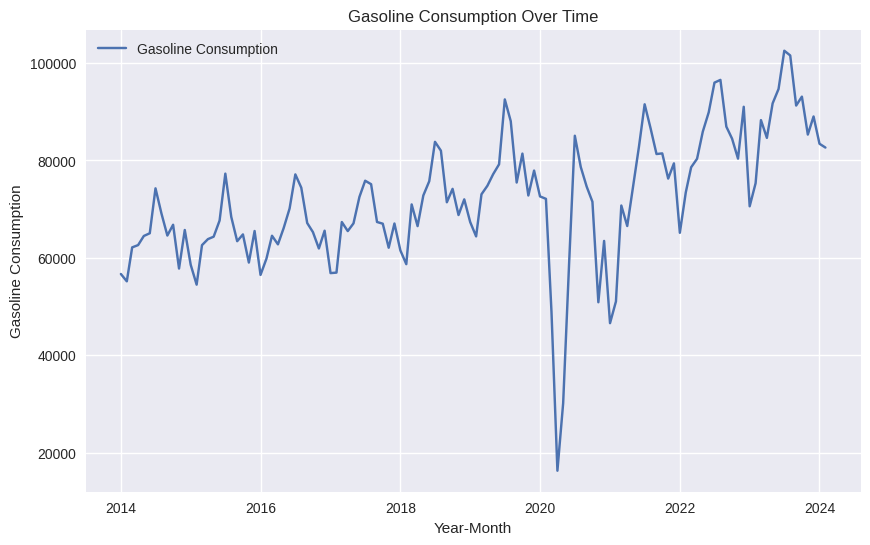

In [159]:
import matplotlib.pyplot as plt

# Plot the gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Catalonia['year_month'], df_Catalonia['gasoline_consumption'], label='Gasoline Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Gasoline Consumption')
plt.title('Gasoline Consumption Over Time - Catalonia')
plt.legend()
plt.show()

In [160]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Catalonia['gasoline_consumption'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('if p-value > 0.05 --> Data is not stationary')

ADF Statistic: -0.549335220823649
p-value: 0.8820242547471588
if p-value > 0.05 --> Data is not stationary


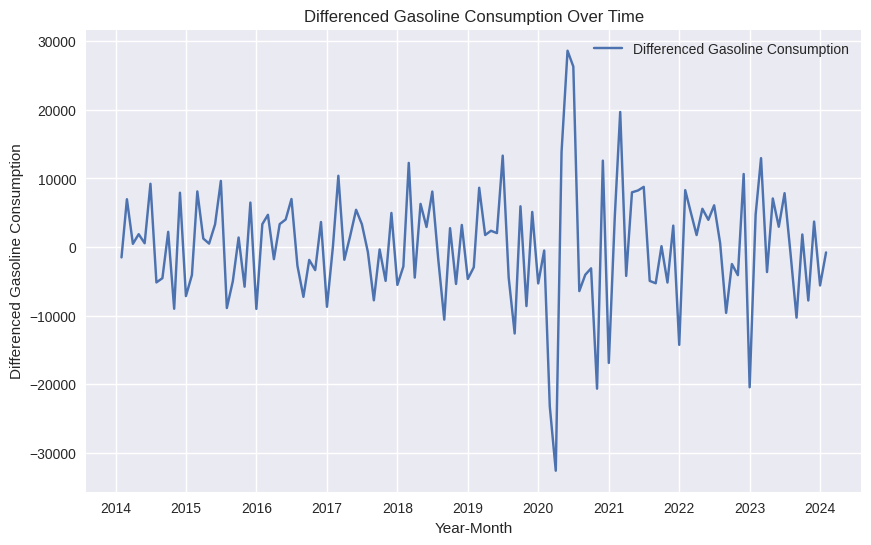

In [161]:
# Differencing the gasoline consumption
df_Catalonia['gasoline_consumption_diff'] = df_Catalonia['gasoline_consumption'].diff()

# Plot the differenced gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Catalonia['year_month'], df_Catalonia['gasoline_consumption_diff'], label='Differenced Gasoline Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Differenced Gasoline Consumption')
plt.title('Differenced Gasoline Consumption Over Time')
plt.legend()
plt.show()

In [162]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Catalonia['gasoline_consumption_diff'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

print('if p-value < 0.05 --> Data is stationary')

ADF Statistic: -3.3299603718608837
p-value: 0.01359122042441188
if p-value < 0.05 --> Data is stationary


In [163]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_result = acorr_ljungbox(df_Catalonia['gasoline_consumption'].dropna(), lags=[10])

# Print the test results
print('Ljung-Box Test Statistic:', ljung_box_result['lb_stat'].values)
print('p-values:', ljung_box_result['lb_pvalue'].values)
print('if p-value < 0.05 --> Data is correlated (and not WN)')

Ljung-Box Test Statistic: [189.37880502]
p-values: [2.63298039e-35]
if p-value < 0.05 --> Data is correlated (and not WN)


In [164]:
# Split the data
train = df_Catalonia[df_Catalonia['year_month'] < '2023-01-01']
test = df_Catalonia[df_Catalonia['year_month'] >= '2023-01-01']

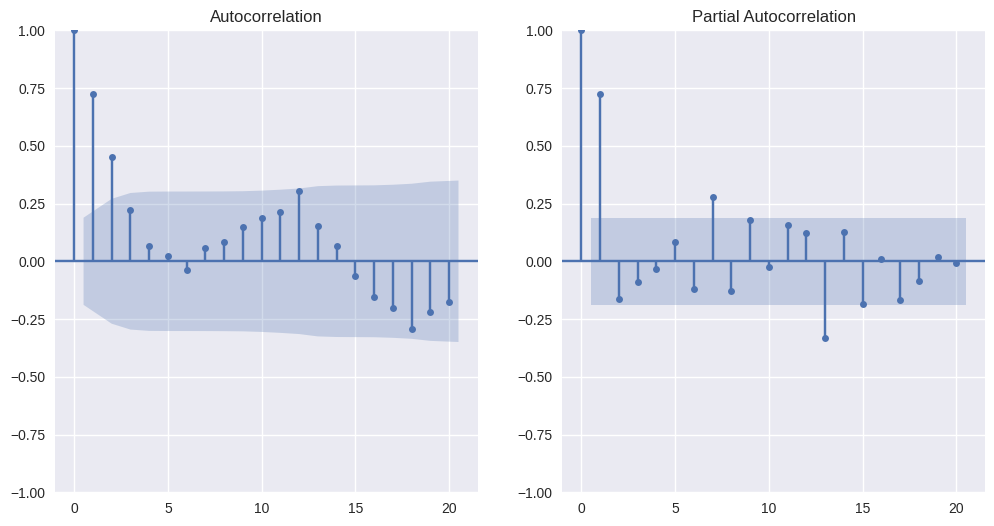

In [165]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train['gasoline_consumption'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(train['gasoline_consumption'], lags=20, ax=plt.gca())
plt.show()

In [166]:
import statsmodels.api as sm

# Define the SARIMAX model with the new exogenous variable
model = sm.tsa.statespace.SARIMAX(train['gasoline_consumption'],
                                  order=(2, 1, 2),
                                  seasonal_order=(1, 1, 0, 12),
                                  exog=train[['covid_period', 'ipi']])

# Fit the model
sarimax_model = model.fit()

# Print the statistical summary
print(sarimax_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                gasoline_consumption   No. Observations:                  108
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 12)   Log Likelihood                -952.899
Date:                             Wed, 10 Jul 2024   AIC                           1921.797
Time:                                     11:54:10   BIC                           1942.228
Sample:                                          0   HQIC                          1930.053
                                             - 108                                         
Covariance Type:                               opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
covid_period -1.012e+04   2818.810     -3.591      0.000   -1.56e+04   -4597.854
ipi            712.66

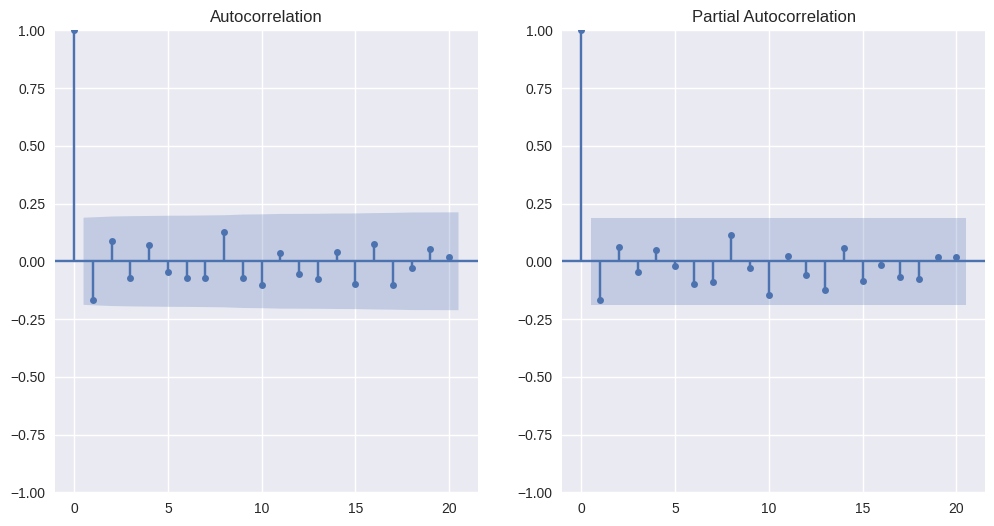

In [167]:
# Plot ACF and PACF of residuals
residuals = sarimax_model.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.show()

In [168]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
ljung_box_result_resid = acorr_ljungbox(residuals, lags=[10])

# Print the test results
print('Ljung-Box Test Statistic (Residuals):', ljung_box_result_resid['lb_stat'].values)
print('p-values (Residuals):', ljung_box_result_resid['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

Ljung-Box Test Statistic (Residuals): [10.42108352]
p-values (Residuals): [0.40435848]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [169]:
# Drop rows with dates beyond 2023
df_Catalonia = df_Catalonia[df_Catalonia['year_month'] < '2024-01-01']

In [170]:
# Ensure there are no infinite values
df_Catalonia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify if there are any remaining NaNs or infinite values
print(df_Catalonia[['covid_period']].isnull().sum())
print(np.isfinite(df_Catalonia[['covid_period']]).sum())

covid_period    0
dtype: int64
covid_period    120
dtype: int64


In [171]:
# Fill missing values with 0
train['covid_period'].fillna(0, inplace=True)
test['covid_period'].fillna(0, inplace=True)

# Replace infinite values with 0
train['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
test['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify that there are no more infinite or missing values
print('Missing values in train:', train[['covid_period']].isnull().sum())
print('Infinite values in train:', np.isfinite(train[['covid_period']]).sum())
print('Missing values in test:', test[['covid_period']].isnull().sum())
print('Infinite values in test:', np.isfinite(test[['covid_period']]).sum())

Missing values in train: covid_period    0
dtype: int64
Infinite values in train: covid_period    108
dtype: int64
Missing values in test: covid_period    0
dtype: int64
Infinite values in test: covid_period    14
dtype: int64


In [172]:
# Ensure the indices are properly aligned
test_exog = test[['covid_period', 'ipi']]

# Make predictions for the test set
predictions = sarimax_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog, dynamic=False)

# Add in-sample predictions to the DataFrame
train_exog = train[['covid_period']]
in_sample_predictions = sarimax_model.predict(start=0, end=len(train) - 1, exog=train_exog, dynamic=False)

# Combine in-sample and out-of-sample predictions
full_predictions = pd.concat([in_sample_predictions, predictions])

# Ensure the length of predictions matches the length of df_global
df_Catalonia['predictions'] = full_predictions.reset_index(drop=True)

In [173]:
# Ensure that the length of the predictions for 2023 matches the number of rows in 2023
rows_2023 = df_Catalonia[df_Catalonia['year_month'] >= '2023-01-01'].index
if len(predictions) == len(rows_2023):
    df_Andalusia.loc[rows_2023, 'historical_and_predicted'] = predictions.values
else:
    print(f"Length mismatch: predictions length is {len(predictions)}, but 2023 rows count is {len(rows_2023)}")

Length mismatch: predictions length is 14, but 2023 rows count is 12


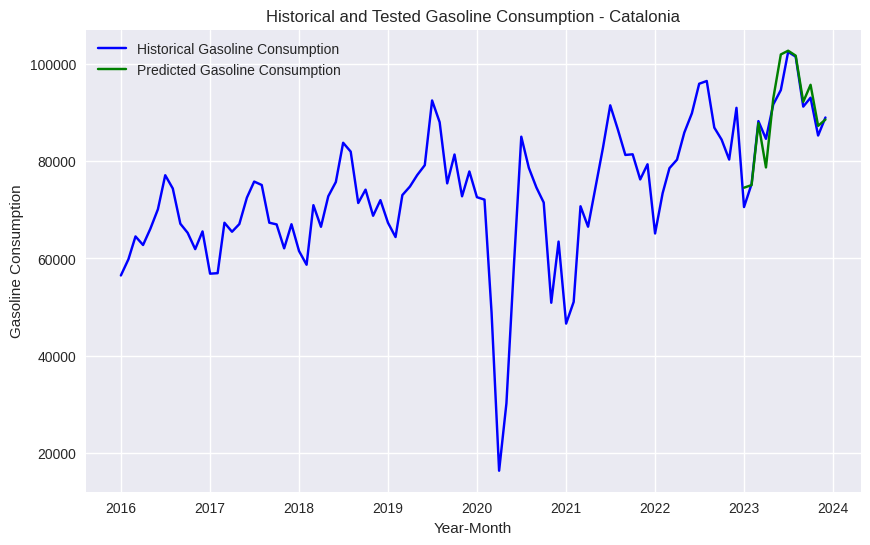

In [174]:
import matplotlib.pyplot as plt

# Filter the dataframe to include data from 2016 onwards
df_filtered = df_Catalonia[df_Catalonia['year_month'] >= '2016-01']

# Separate historical and predicted data
historical_data = df_filtered.copy()
predicted_data = df_filtered[df_filtered['year_month'] >= '2023-01']

# Plot historical and predicted values
plt.figure(figsize=(10, 6))
plt.plot(historical_data['year_month'], historical_data['gasoline_consumption'], label='Historical Gasoline Consumption', color='blue')
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Gasoline Consumption', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Gasoline Consumption')
plt.title('Historical and Tested Gasoline Consumption - Catalonia')
plt.legend()
plt.show()



In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAPE
mape = np.mean(np.abs((test['gasoline_consumption'] - predictions) / test['gasoline_consumption'])) * 100

# Calculate MAE and RMSE
mae = mean_absolute_error(test['gasoline_consumption'], predictions)
rmse = np.sqrt(mean_squared_error(test['gasoline_consumption'], predictions))

# Print accuracy metrics
print('MAPE:', mape)
print('MAE:', mae)
print('RMSE:', rmse)

MAPE: 2.743701517434746
MAE: 2346.069094961057
RMSE: 3329.5962593083805


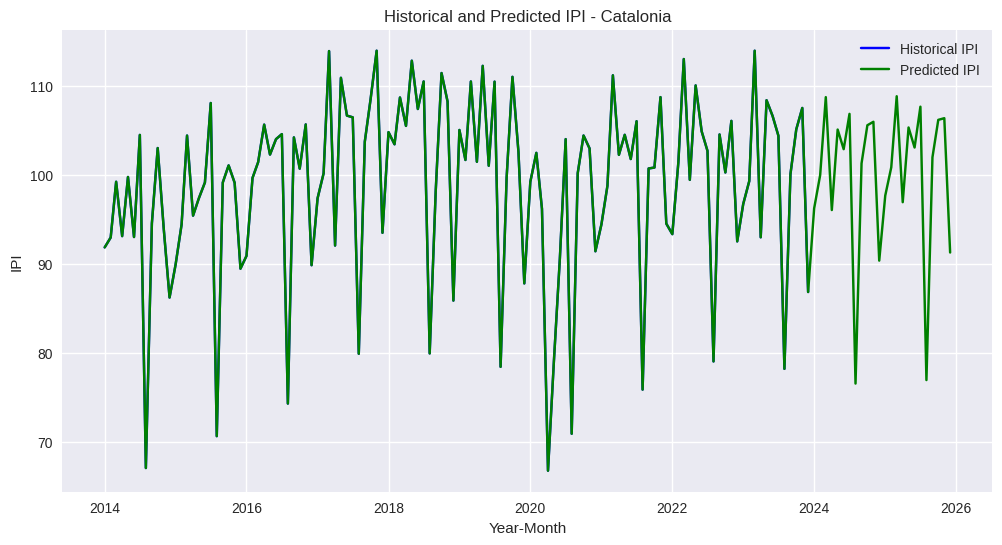

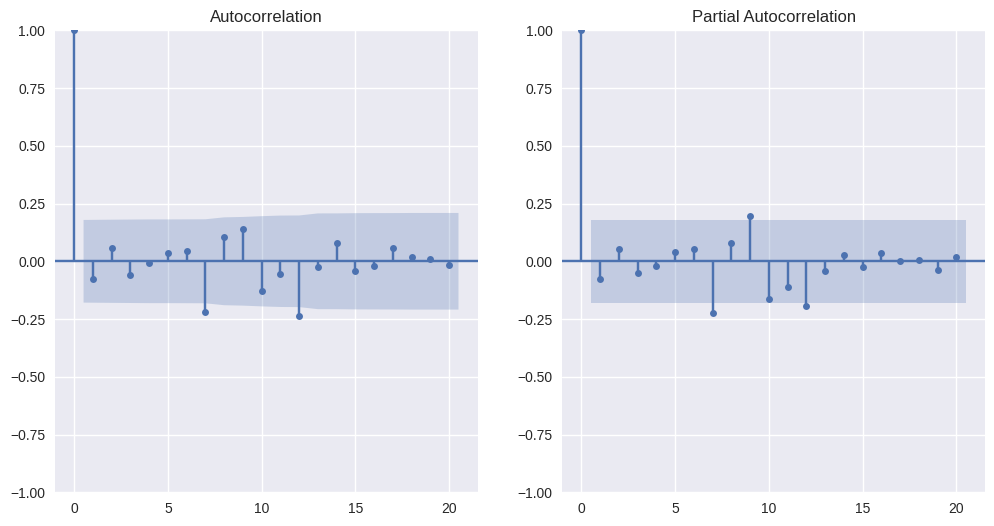

Ljung-Box Test Statistic (IPI Residuals): [14.49229327]
p-values (IPI Residuals): [0.15169722]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [176]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure there are no infinite values
df_Catalonia['ipi'].replace([np.inf, -np.inf], 0, inplace=True)

# Define the SARIMAX model for IPI
model_ipi = sm.tsa.statespace.SARIMAX(df_Catalonia['ipi'],
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12))

# Fit the model
sarimax_model_ipi = model_ipi.fit()

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates_ipi = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df_ipi = pd.DataFrame({'year_month': future_dates_ipi})

# Make predictions for the future period (2024 and 2025) for IPI
future_predictions_ipi = sarimax_model_ipi.get_forecast(steps=len(future_df_ipi)).predicted_mean

# Combine historical and future data for IPI
combined_df_ipi = pd.concat([df_Catalonia[['year_month', 'ipi']], future_df_ipi], ignore_index=True)
combined_df_ipi['predicted_ipi'] = pd.concat([df_Catalonia['ipi'], future_predictions_ipi], ignore_index=True)

# Plot IPI predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['ipi'], label='Historical IPI', color='blue')
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['predicted_ipi'], label='Predicted IPI', color='green')
plt.xlabel('Year-Month')
plt.ylabel('IPI')
plt.title('Historical and Predicted IPI - Catalonia')
plt.legend()
plt.show()

# Plot ACF and PACF of IPI residuals
residuals_ipi = sarimax_model_ipi.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals_ipi, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals_ipi, lags=20, ax=plt.gca())
plt.show()

# Perform the Ljung-Box test on IPI residuals
ljung_box_result_resid_ipi = acorr_ljungbox(residuals_ipi, lags=[10])

# Print the test results for IPI residuals
print('Ljung-Box Test Statistic (IPI Residuals):', ljung_box_result_resid_ipi['lb_stat'].values)
print('p-values (IPI Residuals):', ljung_box_result_resid_ipi['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

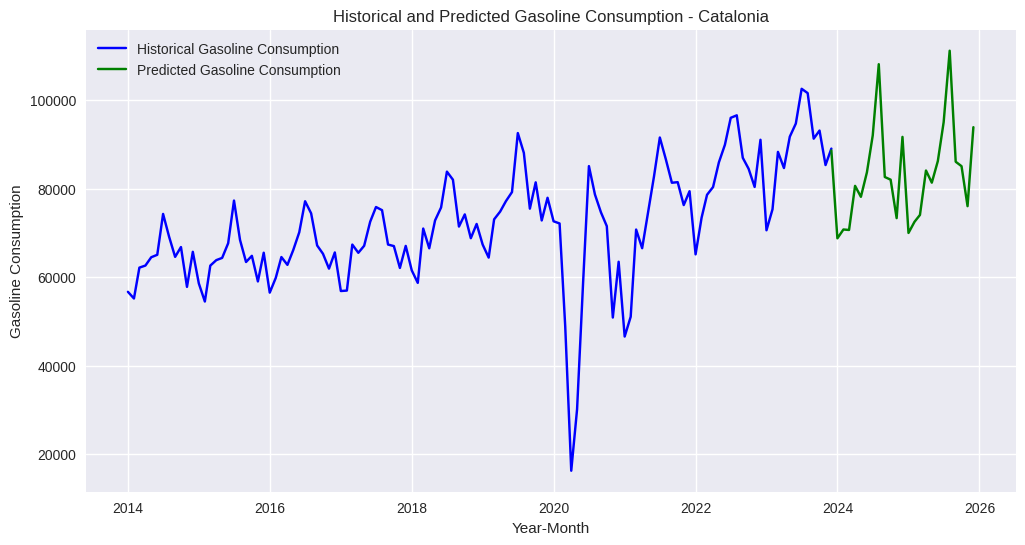

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df_Catalonia already contains the entire dataset including 2023
# Fill missing values and handle infinite values
df_Catalonia['covid_period'].fillna(0, inplace=True)
df_Catalonia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
df_Catalonia['ipi'].fillna(method='ffill', inplace=True)

# Ensure the DataFrame is sorted by date
df_Catalonia.sort_values(by='year_month', inplace=True)
# Define the SARIMAX model using the entire dataset
model = sm.tsa.statespace.SARIMAX(df_Catalonia['gasoline_consumption'],
                                  order=(2, 1, 2),
                                  seasonal_order=(1, 1, 0, 12),
                                  exog=df_Catalonia[['covid_period', 'ipi']]) # Fit the model
sarimax_model = model.fit()
# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df = pd.DataFrame({'year_month': future_dates})

# Create a placeholder for the 'covid_period' column in the future data (assuming no covid period for simplicity)
future_df['covid_period'] = 0

# Fill in the 'ipi' column for future dates based on historical data or assumptions
# Here, we use the last available 'ipi' value from the historical data as a simple assumption
last_ipi_value = df_Catalonia['ipi'].iloc[-1]
future_df['ipi'] = last_ipi_value

# Set the index to 'year_month' to align with the historical data
future_df.set_index('year_month', inplace=True)

# Make predictions for the future period (2024 and 2025)
future_exog = future_df[['covid_period', 'ipi']]
future_predictions = sarimax_model.get_forecast(steps=len(future_df), exog=future_exog).predicted_mean

# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame({'year_month': future_dates, 'predictions': future_predictions.values})

# Merge historical and future predictions
df_Catalonia.reset_index(drop=True, inplace=True)
future_predictions_df.reset_index(drop=True, inplace=True)

# Combine historical and future data
combined_df = pd.concat([df_Catalonia, future_predictions_df], ignore_index=True)

# Correct the 'year_month' column format for future predictions
combined_df['year_month'] = pd.to_datetime(combined_df['year_month'])

# Filter the dataframe to include data before and after 2023
historical_data = combined_df[combined_df['year_month'] < '2024-02-01']
predicted_data = combined_df[combined_df['year_month'] >= '2023-12-01']

# Plot historical and predicted values
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(historical_data['year_month'], historical_data['gasoline_consumption'], label='Historical Gasoline Consumption', color='blue')

# Plot predicted data
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Gasoline Consumption', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Gasoline Consumption')
plt.title('Historical and Predicted Gasoline Consumption - Catalonia')
plt.legend()
plt.show()